<a href="https://colab.research.google.com/github/CarlosLopes88/03_Time_series/blob/main/Auto_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.5 MB/s 
     |████████████████████████████████| 9.8 MB 44.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# origem: https://www.kaggle.com/tevecsystems/retail-sales-forecasting

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera

df = pd.read_csv('https://raw.githubusercontent.com/CarlosLopes88/projeto_prev_vendas/main/mock_kaggle.csv', delimiter=',',decimal='.')

df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [3]:
# conversão do campo data, filtro de um ano e indexando as datas

df['data'] = pd.to_datetime(df['data'])

df = df.loc[df['data'].between('2015-01-01', '2016-07-31')]

df = df.set_index('data')

df = df.drop(columns=['estoque','preco'],axis=1)

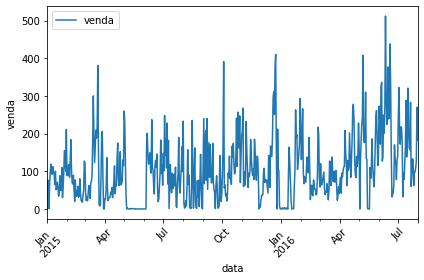

In [4]:
df.plot()
plt.xticks(rotation=45)
plt.xlabel('data')
plt.ylabel('venda')
plt.tight_layout()

In [5]:
stepwise=auto_arima(df,start_p=1,start_q=1,max_p=100,max_q=100,m=7,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=6767.832, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=6547.793, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.18 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=6723.760, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=6495.457, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.90 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=6537.648, Time=0.35 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=6486.962, Time=0.58 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=6540.192, Time=0.35 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=2.09 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=1.73 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=6471.693, Time=1.59 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=6522.789, Time=1.12 s

In [6]:
stepwise

ARIMA(order=(4, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [7]:
stepwise.aic()

6467.764160515968

In [8]:
stepwise1=auto_arima(df,start_p=1,start_q=1,max_p=100,max_q=100,m=7,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=6767.832, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=6591.690, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=2.27 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=6537.648, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=2.59 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=6705.278, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.99 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=1.08 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=6529.542, Time=0.24 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=3.16 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=6477.002, Time=0.4

In [9]:
stepwise1

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(2, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [10]:
stepwise1.aic()

6461.49052883974

In [11]:
train=df.loc['2015-01-01':'2016-06-30']
test=df.loc['2016-07-01':]

In [12]:
stepwise.fit(train)
stepwise1.fit(train)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(2, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [13]:
future_forecast=stepwise.predict(n_periods=31)
future_forecast1=stepwise1.predict(n_periods=31)

In [14]:
future_forecast=pd.DataFrame(future_forecast,index=test.index, columns=['previsão modelo 1'])
future_forecast1=pd.DataFrame(future_forecast1,index=test.index, columns=['previsão modelo 2'])

<Figure size 1440x360 with 0 Axes>

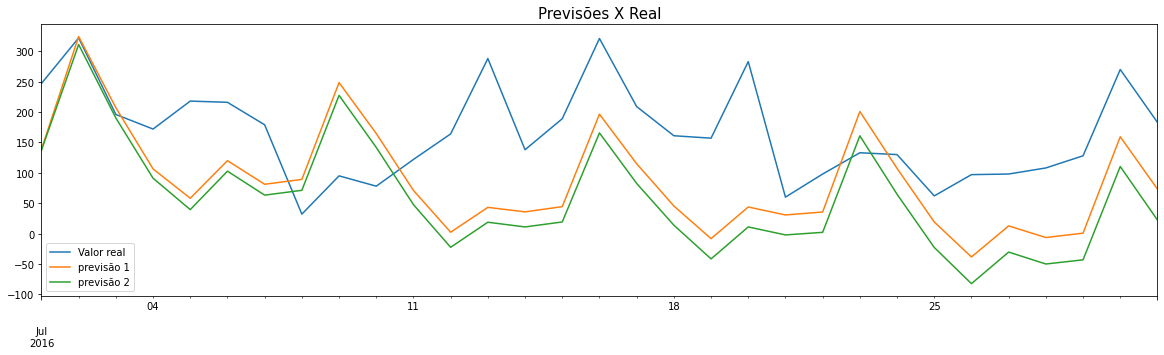

In [15]:
plt.figure(figsize=(20,5))
pd.concat([test,future_forecast,future_forecast1],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.legend(['Valor real','previsão 1','previsão 2'])
plt.show();

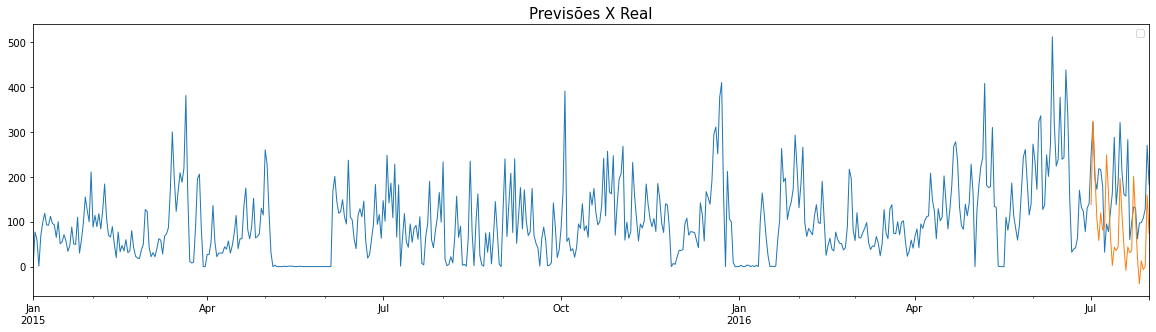

In [16]:
pd.concat([df,future_forecast],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

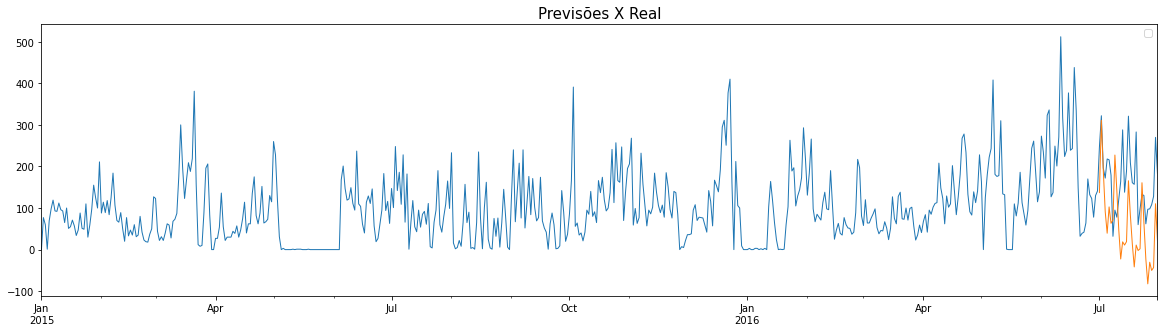

In [17]:
pd.concat([df,future_forecast1],axis=1).plot(linewidth=1, figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

In [18]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  547
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -3044.664
Date:                           Sun, 13 Feb 2022   AIC                           6103.328
Time:                                   22:00:45   BIC                           6133.356
Sample:                                        0   HQIC                          6115.073
                                           - 547                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3678      0.031    -11.754      0.000      -0.429      -0.306
ar.L2         -0.2188      0.041     -5.333      0.000      -0.299      -0.138
ar.L3         -0.1964      0.046     -4.313      0.000      -0.286      -0.107
ar.L4         -0.1084      0.041     -2.637      0.008      -0.189      -0.028
ar.S.L7       -0.6818      0.041    -16.453      0.000      -0.763      -0.601
ar.S.L14      -0.3155      0.037     -8.596      0.000      -0.387      -0.244
sigma2      4686.4767    233.297     20.088      0.000    4229.223    5143.731
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                47.67
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            -0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
stepwise1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  547
Model:             SARIMAX(0, 1, 3)x(2, 1, [], 7)   Log Likelihood               -3043.502
Date:                            Sun, 13 Feb 2022   AIC                           6099.005
Time:                                    22:00:45   BIC                           6124.743
Sample:                                         0   HQIC                          6109.072
                                            - 547                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3792      0.031    -12.085      0.000      -0.441      -0.318
ma.L2         -0.0957      0.043     -2.242      0.025      -0.179      -0.012
ma.L3         -0.1029      0.043     -2.410      0.016      -0.187      -0.019
ar.S.L7       -0.6788      0.041    -16.391      0.000      -0.760      -0.598
ar.S.L14      -0.3194      0.036     -8.850      0.000      -0.390      -0.249
sigma2      4664.6647    236.473     19.726      0.000    4201.186    5128.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.83
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
print("RMSE do modelo 1: %.3f" % np.sqrt(mean_squared_error(test, future_forecast)))
print('')
print("RMSE do modelo 2: %.3f" % np.sqrt(mean_squared_error(test, future_forecast1)))

RMSE do modelo 1: 117.530

RMSE do modelo 2: 140.590


In [21]:
erros=pd.DataFrame(np.array(future_forecast.values.tolist())-np.array(test.values.tolist()))

erros1=pd.DataFrame(np.array(future_forecast1.values.tolist())-np.array(test.values.tolist()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


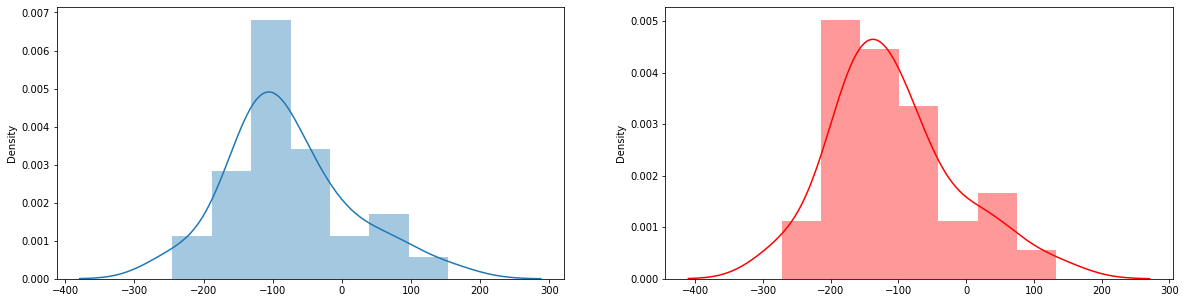

In [22]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(erros,ax=ax[0])
sns.distplot(erros1,ax=ax[1], color='red');

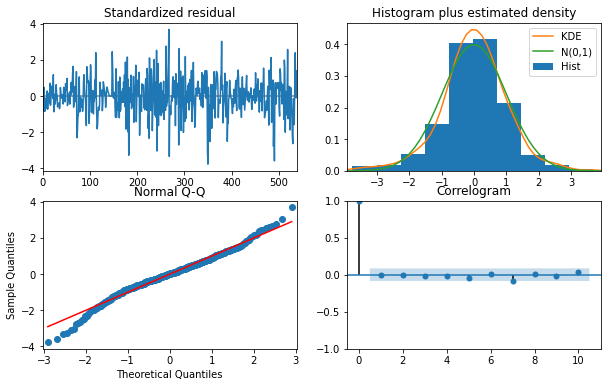

In [23]:
stepwise.plot_diagnostics(figsize=(10,6));

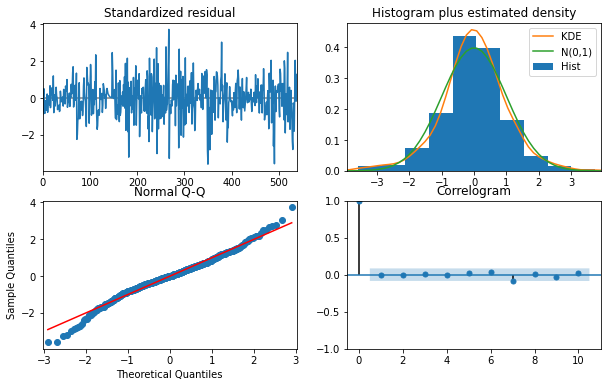

In [24]:
stepwise1.plot_diagnostics(figsize=(10,6));

In [25]:
test = jarque_bera(erros)
print('Estatística Jarque-Bera :', test[0])
print('p-valor :', test[1])
print('Assimetria :', test[2])
print('Curtose :',test[3])

Estatística Jarque-Bera : [2.17383053]
p-valor : [0.33725523]
Assimetria : [0.61565563]
Curtose : [3.40845827]


In [26]:
test1 = jarque_bera(erros1)
print('Estatística Jarque-Bera :', test1[0])
print('p-valor :', test1[1])
print('Assimetria :', test1[2])
print('Curtose :',test1[3])

Estatística Jarque-Bera : [2.45176154]
p-valor : [0.29349908]
Assimetria : [0.66742851]
Curtose : [3.34102013]


In [27]:
stepwise.fit(df)

ARIMA(order=(4, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [28]:
future_forecast2=stepwise.predict(n_periods=31)

In [29]:
future_forecast2=pd.DataFrame(future_forecast2, 
                              index=pd.date_range(start='2016-08-01',
                                                  end='2016-08-31', freq='D'),columns=['nova previsão'])

<Figure size 1440x360 with 0 Axes>

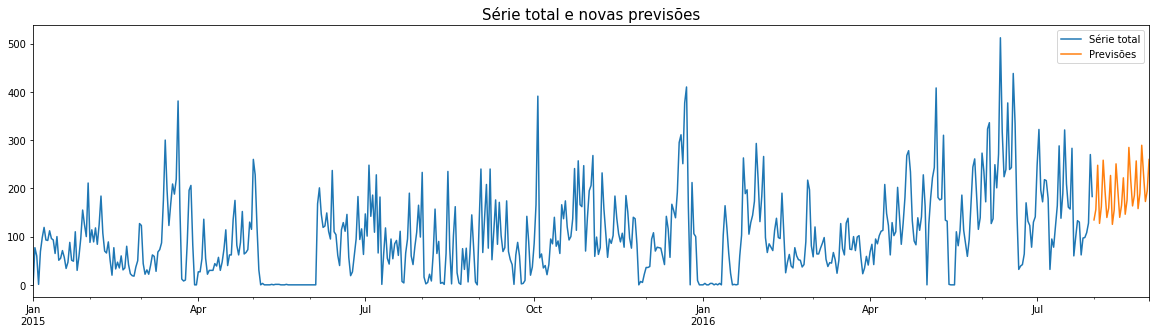

In [30]:
plt.figure(figsize=(20,5))
pd.concat([df,future_forecast2],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Série total e novas previsões',size=15)
plt.legend(['Série total','Previsões'])
plt.show();